In [1]:
import pandas as pd
import io

# O nome do arquivo pode ser um pouco diferente. Ajuste se necessário.
# Exemplo: 'EPL_matches_2000_to_2025.csv'
file_name = 'epl_final.csv'

df = pd.read_csv(file_name)

print("Dataset carregado com sucesso!")

Dataset carregado com sucesso!


In [2]:
# Mostra todos os nomes de coluna do DataFrame
print(df.columns)

Index(['Season', 'MatchDate', 'HomeTeam', 'AwayTeam', 'FullTimeHomeGoals',
       'FullTimeAwayGoals', 'FullTimeResult', 'HalfTimeHomeGoals',
       'HalfTimeAwayGoals', 'HalfTimeResult', 'HomeShots', 'AwayShots',
       'HomeShotsOnTarget', 'AwayShotsOnTarget', 'HomeCorners', 'AwayCorners',
       'HomeFouls', 'AwayFouls', 'HomeYellowCards', 'AwayYellowCards',
       'HomeRedCards', 'AwayRedCards'],
      dtype='object')


In [3]:
# --- Bloco 1 (Corrigido): Seleção de Colunas Essenciais ---
# Usando os nomes exatos do seu arquivo e incluindo as estatísticas da partida.
colunas_essenciais = [
    'Season', 'MatchDate', 'HomeTeam', 'AwayTeam', 'FullTimeHomeGoals',
    'FullTimeAwayGoals', 'FullTimeResult', 'HalfTimeHomeGoals',
    'HalfTimeAwayGoals', 'HalfTimeResult', 'HomeShots', 'AwayShots',
    'HomeShotsOnTarget', 'AwayShotsOnTarget', 'HomeCorners', 'AwayCorners',
    'HomeFouls', 'AwayFouls', 'HomeYellowCards', 'AwayYellowCards',
    'HomeRedCards', 'AwayRedCards'
]

df_essencial = df[colunas_essenciais].copy()

# --- Bloco 2 (Corrigido): Conversão da Coluna de Data ---
# Corrigindo 'Date' para 'MatchDate'
df_essencial['MatchDate'] = pd.to_datetime(df_essencial['MatchDate'], dayfirst=True, errors='coerce')

# --- Bloco 3 (Inalterado): Filtrando Apenas Jogos do Tottenham ---
nome_time = 'Tottenham'
df_spurs = df_essencial[
    (df_essencial['HomeTeam'] == nome_time) |
    (df_essencial['AwayTeam'] == nome_time)
].copy()

# Renomeando a coluna de data para facilitar o acesso
df_spurs = df_spurs.rename(columns={'MatchDate': 'Date'})

# Ordenamos por data para garantir uma ordem cronológica
df_spurs = df_spurs.sort_values(by='Date', ascending=True).reset_index(drop=True)


# --- Bloco 4: Célula de verificação final ---
print("--- Verificação Final do Dataset do Tottenham ---")
df_spurs.info()
print("\n--- Primeiras 5 partidas do Tottenham no dataset ---")
print(df_spurs.head())
print("\n--- Últimas 5 partidas do Tottenham no dataset ---")
print(df_spurs.tail())

--- Verificação Final do Dataset do Tottenham ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 938 entries, 0 to 937
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Season             938 non-null    object        
 1   Date               938 non-null    datetime64[ns]
 2   HomeTeam           938 non-null    object        
 3   AwayTeam           938 non-null    object        
 4   FullTimeHomeGoals  938 non-null    int64         
 5   FullTimeAwayGoals  938 non-null    int64         
 6   FullTimeResult     938 non-null    object        
 7   HalfTimeHomeGoals  938 non-null    int64         
 8   HalfTimeAwayGoals  938 non-null    int64         
 9   HalfTimeResult     938 non-null    object        
 10  HomeShots          938 non-null    int64         
 11  AwayShots          938 non-null    int64         
 12  HomeShotsOnTarget  938 non-null    int64         
 13  AwayShotsOnTarg

/tmp/ipython-input-3379583383.py:16: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df_essencial['MatchDate'] = pd.to_datetime(df_essencial['MatchDate'], dayfirst=True, errors='coerce')


--- Desempenho Geral do Tottenham (2000-2025) ---
Resultado
Vitoria    440
Derrota    292
Empate     206
Name: count, dtype: int64


/tmp/ipython-input-3154773533.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=desempenho_geral.index, y=desempenho_geral.values, ax=ax, palette='viridis')


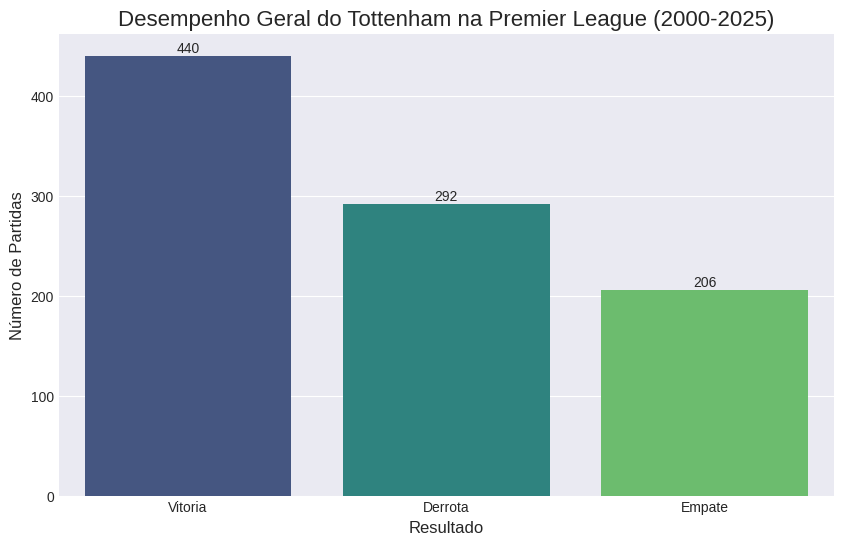

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Bloco 1: Engenharia de Atributos (Feature Engineering) ---
# Vamos criar uma coluna 'Resultado' para o Tottenham (Vitoria, Empate, Derrota)

# Condições para a vitória do Tottenham
condicao_vitoria = (
    (df_spurs['HomeTeam'] == 'Tottenham') & (df_spurs['FullTimeResult'] == 'H') |
    (df_spurs['AwayTeam'] == 'Tottenham') & (df_spurs['FullTimeResult'] == 'A')
)

# Condição para o empate
condicao_empate = (df_spurs['FullTimeResult'] == 'D')

# Usamos np.select para criar a nova coluna de forma eficiente
df_spurs['Resultado'] = np.select(
    [condicao_vitoria, condicao_empate],
    ['Vitoria', 'Empate'],
    default='Derrota' # Se não for vitória nem empate, foi derrota
)


# --- Bloco 2: Primeira Análise - Desempenho Geral ---
# Agora que temos a coluna 'Resultado', podemos facilmente contar o desempenho geral.
desempenho_geral = df_spurs['Resultado'].value_counts()

print("--- Desempenho Geral do Tottenham (2000-2025) ---")
print(desempenho_geral)


# --- Bloco 3: Primeira Visualização - Gráfico de Desempenho ---
# Um bom projeto de portfólio sempre tem visuais claros.
plt.style.use('seaborn-v0_8-darkgrid') # Estilo do gráfico
fig, ax = plt.subplots(figsize=(10, 6)) # Tamanho da figura

# Criando o gráfico de barras
sns.barplot(x=desempenho_geral.index, y=desempenho_geral.values, ax=ax, palette='viridis')

# Adicionando títulos e rótulos
ax.set_title('Desempenho Geral do Tottenham na Premier League (2000-2025)', fontsize=16)
ax.set_xlabel('Resultado', fontsize=12)
ax.set_ylabel('Número de Partidas', fontsize=12)

# Adicionando os números no topo de cada barra para clareza
for i in ax.containers:
    ax.bar_label(i,)

# Mostrando o gráfico
plt.show()

--- Desempenho Temporada a Temporada ---
Resultado  Derrota  Empate  Vitoria  TotalJogos  TaxaDeVitorias
Season                                                         
2000/01         15      10       13          38           34.21
2001/02         16       8       14          38           36.84
2002/03         16       8       14          38           36.84
2003/04         16       5       12          33           36.36
2004/05         12       9       13          34           38.24
2005/06          9      11       18          38           47.37
2006/07         12       9       17          38           44.74
2007/08         14      13       11          38           28.95
2008/09         15       9       14          38           36.84
2009/10         10       7       21          38           55.26
2010/11          8      14       16          38           42.11
2011/12          9       9       20          38           52.63
2012/13          8       9       21          38           55.26

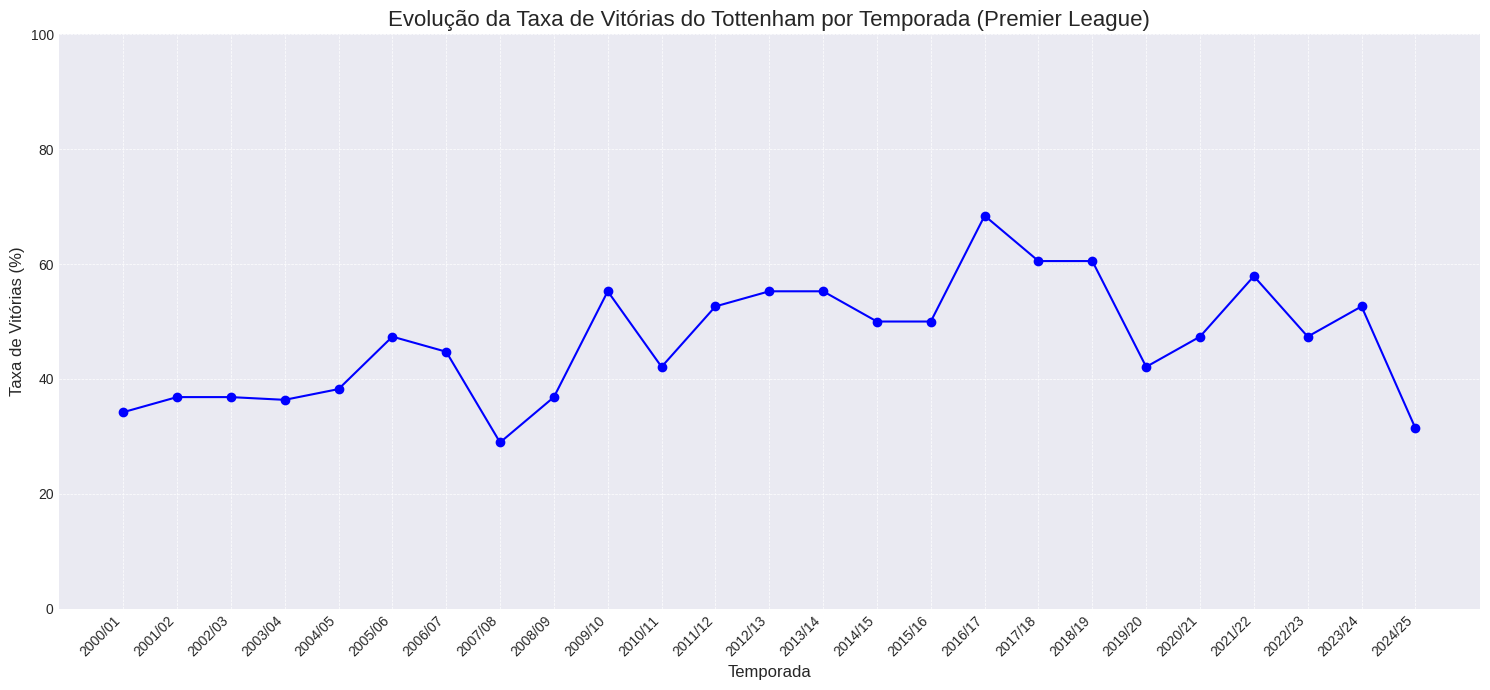

In [5]:
# --- Bloco 1: Agrupando Resultados por Temporada ---
# Vamos agrupar nosso dataframe por 'Season' e contar os resultados em cada uma.
# O .unstack(fill_value=0) transforma o resultado em uma tabela limpa.
desempenho_por_temporada = df_spurs.groupby('Season')['Resultado'].value_counts().unstack(fill_value=0)

# Adicionando uma coluna de total de jogos para calcular as taxas
desempenho_por_temporada['TotalJogos'] = desempenho_por_temporada.sum(axis=1)

# Adicionando a coluna mais importante: a Taxa de Vitórias
desempenho_por_temporada['TaxaDeVitorias'] = (desempenho_por_temporada['Vitoria'] / desempenho_por_temporada['TotalJogos']) * 100

print("--- Desempenho Temporada a Temporada ---")
# Usamos .round(2) para arredondar a taxa de vitórias para 2 casas decimais
print(desempenho_por_temporada.round(2))


# --- Bloco 2: Visualizando a Evolução da Taxa de Vitórias ---
# Gráficos de linha são perfeitos para mostrar tendências ao longo do tempo.
fig, ax = plt.subplots(figsize=(15, 7))

# Plotando a taxa de vitórias
ax.plot(desempenho_por_temporada.index, desempenho_por_temporada['TaxaDeVitorias'], marker='o', linestyle='-', color='b')

# Melhorando o gráfico com títulos e rótulos
ax.set_title('Evolução da Taxa de Vitórias do Tottenham por Temporada (Premier League)', fontsize=16)
ax.set_xlabel('Temporada', fontsize=12)
ax.set_ylabel('Taxa de Vitórias (%)', fontsize=12)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Rotacionando os rótulos do eixo X para melhor legibilidade
plt.xticks(rotation=45, ha="right")
plt.ylim(0, 100) # Forçando o eixo Y a ir de 0 a 100%

# Garantindo que o layout fique bom
plt.tight_layout()
plt.show()

In [6]:
#IMPORTAÇÕES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# --- Bloco 1: Carregando o Dataset de Transferências ---

# Adicionamos a importação aqui por segurança, mas o ideal é que ela esteja no topo do notebook.
import pandas as pd

file_name_transfers = 'transfer_EPL_00-24.csv'

df_transfers = pd.read_csv(file_name_transfers)

print("--- Dataset de Transferências carregado com sucesso! ---")

# --- Bloco 2: Inspeção Inicial do df_transfers ---
print("\n--- Visualizando as 5 primeiras linhas (df_transfers.head()) ---")
print(df_transfers.head())

print("\n--- Resumo técnico do DataFrame (df_transfers.info()) ---")
df_transfers.info()

--- Dataset de Transferências carregado com sucesso! ---

--- Visualizando as 5 primeiras linhas (df_transfers.head()) ---
   Unnamed: 0             Name Age Nationality            Position  \
0           0    Rio Ferdinand  22     England         Centre-Back   
1           1  Olivier Dacourt  25      France  Defensive Midfield   
2           2      Mark Viduka  24   Australia      Centre-Forward   
3           3   Dominic Matteo  26    Scotland           Left-Back   
4           4      Jacob Burns  22   Australia  Defensive Midfield   

  Position_Shortcut Market_Value       Former_Team Former_Team_Country  \
0                CB          NaN   West Ham United             England   
1                DM          NaN           RC Lens              France   
2                CF          NaN         Celtic FC            Scotland   
3                LB          NaN      Liverpool FC             England   
4                DM          NaN  Parramatta Power           Australia   

      Fee L

In [8]:
# --- Bloco 1: Cópia e Filtragem Inicial ---
df_transfers_cleaned = df_transfers.copy()
df_transfers_cleaned = df_transfers_cleaned.drop('Unnamed: 0', axis=1)

nome_time = 'Tottenham Hotspur'
df_spurs_transfers = df_transfers_cleaned[
    (df_transfers_cleaned['Former_Team'] == nome_time) |
    (df_transfers_cleaned['New_Team'] == nome_time)
].copy()


# --- Bloco 2: Função para Limpar a Coluna 'Fee' (VERSÃO ATUALIZADA) ---
# Adicionamos uma nova condição para lidar com 'loan fee'.
def clean_fee(fee):
    if pd.isna(fee) or not isinstance(fee, str):
        return 0

    fee = fee.lower()
    # NOVA CONDIÇÃO: Se for taxa de empréstimo, consideramos 0.
    if 'loan fee' in fee or 'free transfer' in fee or 'end of loan' in fee:
        return 0
    elif 'm' in fee:
        return float(fee.replace('m', '').replace('€', '').strip()) * 1000000
    elif 'k' in fee:
        return float(fee.replace('k', '').replace('€', '').strip()) * 1000
    else:
        try:
            return float(fee.replace('€', '').strip())
        except:
            return 0

# --- Bloco 3: Aplicando a Limpeza ---
df_spurs_transfers['Fee_Numeric'] = df_spurs_transfers['Fee'].apply(clean_fee)
df_spurs_transfers['Age'] = pd.to_numeric(df_spurs_transfers['Age'], errors='coerce')
df_spurs_transfers = df_spurs_transfers.drop(['Fee', 'Market_Value', 'Loan_End_Date'], axis=1)


# --- Bloco 4: Verificação Final ---
print("--- Verificação Final do Dataset de Transferências do Tottenham ---")
df_spurs_transfers.info()
print("\n--- Amostra de Transferências Limpas ---")
print(df_spurs_transfers.sample(10))

--- Verificação Final do Dataset de Transferências do Tottenham ---
<class 'pandas.core.frame.DataFrame'>
Index: 632 entries, 98 to 10500
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 632 non-null    object 
 1   Age                  632 non-null    int64  
 2   Nationality          632 non-null    object 
 3   Position             632 non-null    object 
 4   Position_Shortcut    632 non-null    object 
 5   Former_Team          632 non-null    object 
 6   Former_Team_Country  632 non-null    object 
 7   New_Team             632 non-null    object 
 8   Season               632 non-null    object 
 9   Fee_Numeric          632 non-null    float64
dtypes: float64(1), int64(1), object(8)
memory usage: 54.3+ KB

--- Amostra de Transferências Limpas ---
                  Name  Age Nationality            Position Position_Shortcut  \
3901      Jimmy Walker   36     England    

--- Balanço de Transferências por Temporada (em Euros) ---
       Season          Spent        Gained      Net_Spend
0   2000/2001  25,740,000.00          0.00  25,740,000.00
1   2001/2002  28,050,000.00  9,750,000.00  18,300,000.00
2   2002/2003  10,500,000.00  1,350,000.00   9,150,000.00
3   2003/2004  29,750,000.00    550,000.00  29,200,000.00
4   2004/2005  44,725,000.00  3,000,000.00  41,725,000.00
5   2005/2006  36,510,000.00 10,350,000.00  26,160,000.00
6   2006/2007  61,000,000.00 35,600,000.00  25,400,000.00
7   2007/2008  94,150,000.00 19,800,000.00  74,350,000.00
8   2008/2009 143,950,000.00 87,050,000.00  56,900,000.00
9   2009/2010  40,300,000.00 18,000,000.00  22,300,000.00
10  2010/2011  25,900,000.00          0.00  25,900,000.00
11  2011/2012   6,750,000.00 28,550,000.00 -21,800,000.00
12  2012/2013  73,250,000.00  8,750,000.00  64,500,000.00
13  2013/2014 122,550,000.00 19,250,000.00 103,300,000.00
14  2014/2015  48,480,000.00 39,400,000.00   9,080,000.00
15  2015/2016

/tmp/ipython-input-185880291.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Season', y='Net_Spend', data=transfer_summary, ax=ax, palette=colors)


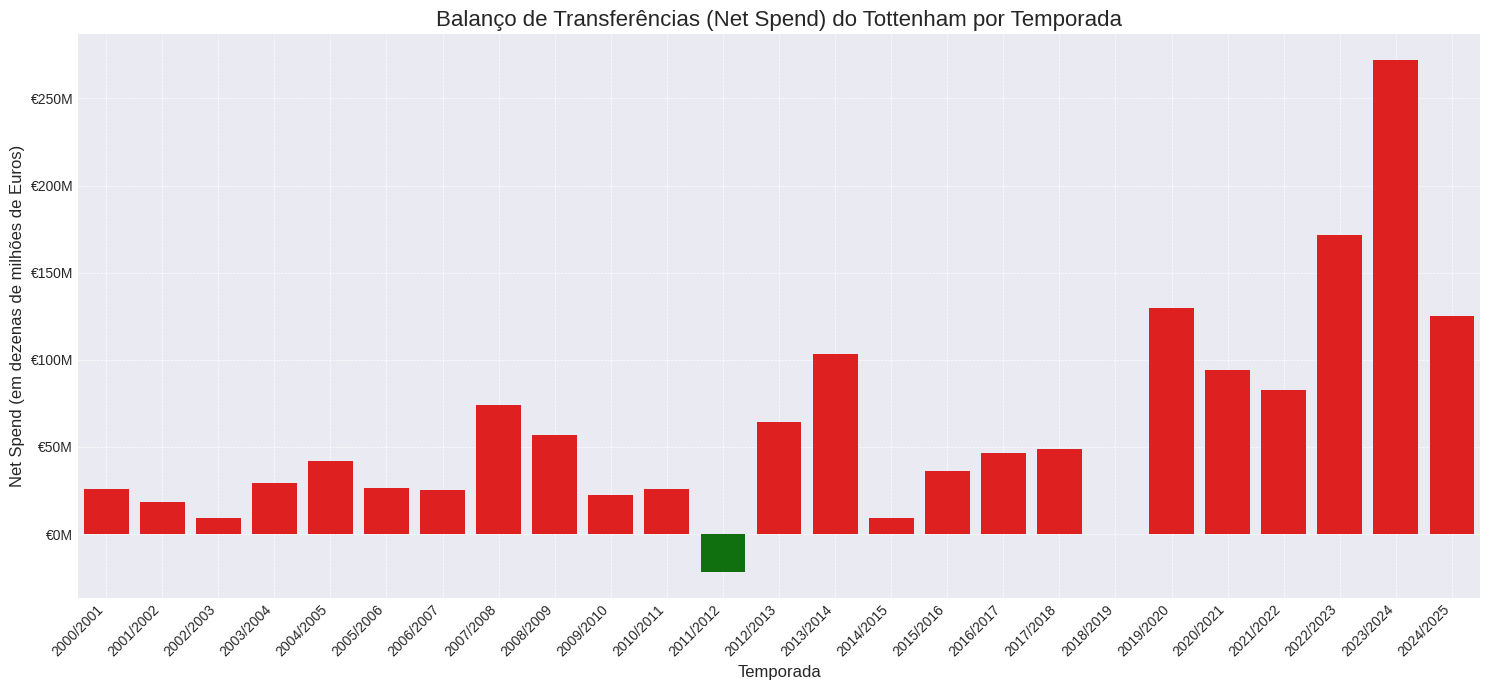

In [9]:
# --- Bloco 1: Engenharia de Atributos - Direção da Transferência ---
# Primeiro, determinamos se cada transferência foi uma ENTRADA (In) ou uma SAÍDA (Out).
df_spurs_transfers['Direction'] = np.where(df_spurs_transfers['New_Team'] == 'Tottenham Hotspur', 'In', 'Out')

# Criamos colunas separadas para gastos e ganhos para facilitar a agregação
df_spurs_transfers['Money_Spent'] = np.where(df_spurs_transfers['Direction'] == 'In', df_spurs_transfers['Fee_Numeric'], 0)
df_spurs_transfers['Money_Gained'] = np.where(df_spurs_transfers['Direction'] == 'Out', df_spurs_transfers['Fee_Numeric'], 0)


# --- Bloco 2: Agrupando por Temporada ---
# Agrupamos os dados por temporada e somamos os gastos e ganhos
transfer_summary = df_spurs_transfers.groupby('Season').agg(
    Spent=('Money_Spent', 'sum'),
    Gained=('Money_Gained', 'sum')
).reset_index()

# Calculamos a coluna final e mais importante: Net Spend
transfer_summary['Net_Spend'] = transfer_summary['Spent'] - transfer_summary['Gained']


# --- Bloco 3: Verificação da Tabela ---
print("--- Balanço de Transferências por Temporada (em Euros) ---")
# Formatando a saída para melhor legibilidade em milhões
pd.options.display.float_format = '{:,.2f}'.format
print(transfer_summary)


# --- Bloco 4: Visualização do Net Spend ---
# Um gráfico de barras é perfeito para visualizar o gasto líquido.
fig, ax = plt.subplots(figsize=(15, 7))

# Criamos uma coluna de cor para diferenciar gastos de lucros
colors = ['red' if x > 0 else 'green' for x in transfer_summary['Net_Spend']]

# Plotando o gráfico de barras
sns.barplot(x='Season', y='Net_Spend', data=transfer_summary, ax=ax, palette=colors)

# Adicionando títulos e rótulos
ax.set_title('Balanço de Transferências (Net Spend) do Tottenham por Temporada', fontsize=16)
ax.set_xlabel('Temporada', fontsize=12)
ax.set_ylabel('Net Spend (em dezenas de milhões de Euros)', fontsize=12)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Formatando o eixo Y para exibir em milhões
ax.yaxis.set_major_formatter(lambda x, pos: f'€{x/1e6:.0f}M')

# Rotacionando os rótulos do eixo X
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

/tmp/ipython-input-622360466.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right")


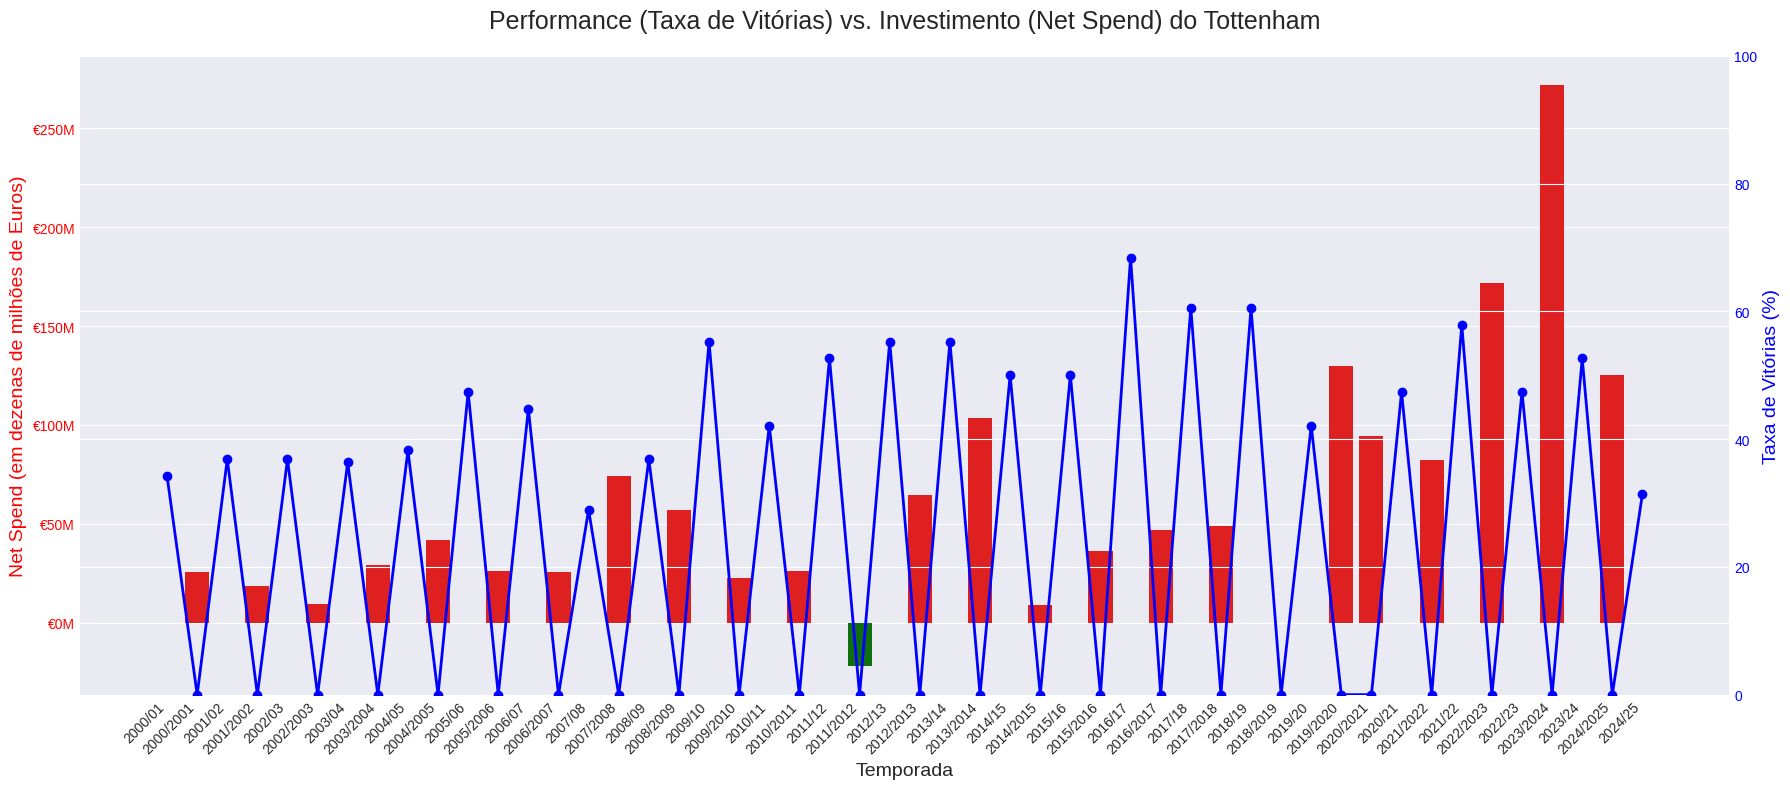

In [11]:
### SPRINT FINAL (VERSÃO CORRIGIDA COM OUTER JOIN) ###

# Mescla as duas tabelas de análise
# CORREÇÃO: Usando how='outer' para garantir que NENHUMA temporada seja perdida na fusão.
df_final = pd.merge(desempenho_por_temporada, transfer_summary, on='Season', how='outer')

# Preenchemos os valores nulos que podem surgir com 0, para não quebrar o gráfico
df_final = df_final.fillna(0)


# Cria a Visualização Final (Gráfico de Eixo Duplo)
fig, ax1 = plt.subplots(figsize=(18, 8))

# Eixo 1 (Esquerda): Barras para o Net Spend
colors = ['red' if x > 0 else 'green' for x in df_final['Net_Spend']]
sns.barplot(x='Season', y='Net_Spend', data=df_final, ax=ax1, hue='Season', palette=colors, legend=False)
ax1.set_ylabel('Net Spend (em dezenas de milhões de Euros)', fontsize=14, color='r')
ax1.tick_params(axis='y', labelcolor='r')
ax1.yaxis.set_major_formatter(lambda x, pos: f'€{x/1e6:.0f}M')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right")
ax1.set_xlabel('Temporada', fontsize=14)

# Eixo 2 (Direita): Linha para a Taxa de Vitórias
ax2 = ax1.twinx()
ax2.plot(df_final['Season'], df_final['TaxaDeVitorias'], color='b', marker='o', linewidth=2, label='Taxa de Vitórias')
ax2.set_ylabel('Taxa de Vitórias (%)', fontsize=14, color='b')
ax2.tick_params(axis='y', labelcolor='b')
ax2.set_ylim(0, 100)

# Título Principal
plt.title('Performance (Taxa de Vitórias) vs. Investimento (Net Spend) do Tottenham', fontsize=18, pad=20)
fig.tight_layout()
plt.show()